<a href="https://colab.research.google.com/github/13472889991/13472889991.github.io/blob/master/Final_project_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this final project, we will be looking at the **John Hopkins CSSE Covid 19 data**, a collection of Covid-19 data such as deaths, cases, testing amount that is updated daily. Since the data it provides us is by county for places in the United States, as well as by other groupings for other countries, we mostly focus on the United States data. We also incoporate demographic data from the **National Bureau of Economic Research**, which provides us with gender, as well as race demographics, and age that is split by 19 different age groups. I will have the description for the data in another text file. This data is for each county. 
 We are firstly interested in determining which factors are most effective at predicting COVID cases by county for our generalized linear model use case. I will preprocess and merge the data using python as I am more comfortable and familiar with it for dealing with lots of data manipulations. Unfortunately, I was unable to incorporate  age data because the csv with age demographics was too large to even read in.
 Lastly, we also incorporate the general political leaning of each state from the 2017 Gallup Poll of State party affiliation, and we are interested in whether or not political party affiliation does affect the number of covid cases, or covid deaths, or both.

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [207]:
demographics = pd.read_csv('uswbo19agesadj.csv')

In [208]:
demographics.head()

,year,st,stfips,county,registry,race,hispanic,sex,age,pop
0,1969,AL,1,1001,99,1,9,1,0,159
1,1969,AL,1,1001,99,1,9,2,0,151
2,1969,AL,1,1001,99,2,9,1,0,71
3,1969,AL,1,1001,99,2,9,2,0,89
4,1969,AL,1,1001,99,1,9,1,1,657


In [209]:
demographics.year.unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [210]:
demographics = demographics[demographics['year'] == 2016]
demographics.head()

,year,st,stfips,county,registry,race,hispanic,sex,age,pop
13856308,2016,AL,1,1001,99,1,9,1,0,232
13856309,2016,AL,1,1001,99,1,9,2,0,219
13856310,2016,AL,1,1001,99,2,9,1,0,84
13856311,2016,AL,1,1001,99,2,9,2,0,82
13856312,2016,AL,1,1001,99,3,9,1,0,5


In [211]:
csse = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-14-2020.csv')

In [212]:
csse.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-12-15 05:26:38,33.93911,67.709953,48718,1969,38252,8497.0,Afghanistan,125.147897,4.041627
1,NaN,NaN,NaN,Albania,2020-12-15 05:26:38,41.15330,20.168300,49191,1016,24820,23355.0,Albania,1709.326569,2.065418
2,NaN,NaN,NaN,Algeria,2020-12-15 05:26:38,28.03390,1.659600,92597,2609,60888,29100.0,Algeria,211.162594,2.817586
3,NaN,NaN,NaN,Andorra,2020-12-15 05:26:38,42.50630,1.521800,7382,79,6706,597.0,Andorra,9554.131884,1.070171
4,NaN,NaN,NaN,Angola,2020-12-15 05:26:38,-11.20270,17.873900,16277,372,8924,6981.0,Angola,49.524941,2.285433


In [213]:
csse = csse.dropna(subset=['FIPS'])
csse.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
649,1001.0,Autauga,Alabama,US,2020-12-15 05:26:38,32.539527,-86.644082,3329,41,0,3288.0,"Autauga, Alabama, US",5958.581682,1.231601
650,1003.0,Baldwin,Alabama,US,2020-12-15 05:26:38,30.727750,-87.722071,10898,141,0,10757.0,"Baldwin, Alabama, US",4881.872833,1.293815
651,1005.0,Barbour,Alabama,US,2020-12-15 05:26:38,31.868263,-85.387129,1275,30,0,1245.0,"Barbour, Alabama, US",5164.870777,2.352941
652,1007.0,Bibb,Alabama,US,2020-12-15 05:26:38,32.996421,-87.125115,1455,40,0,1415.0,"Bibb, Alabama, US",6497.276056,2.749141
653,1009.0,Blount,Alabama,US,2020-12-15 05:26:38,33.982109,-86.567906,3803,47,0,3756.0,"Blount, Alabama, US",6576.626431,1.235866


In [214]:
csse['FIPS']=csse['FIPS'].astype('int')
csse.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
649,1001,Autauga,Alabama,US,2020-12-15 05:26:38,32.539527,-86.644082,3329,41,0,3288.0,"Autauga, Alabama, US",5958.581682,1.231601
650,1003,Baldwin,Alabama,US,2020-12-15 05:26:38,30.727750,-87.722071,10898,141,0,10757.0,"Baldwin, Alabama, US",4881.872833,1.293815
651,1005,Barbour,Alabama,US,2020-12-15 05:26:38,31.868263,-85.387129,1275,30,0,1245.0,"Barbour, Alabama, US",5164.870777,2.352941
652,1007,Bibb,Alabama,US,2020-12-15 05:26:38,32.996421,-87.125115,1455,40,0,1415.0,"Bibb, Alabama, US",6497.276056,2.749141
653,1009,Blount,Alabama,US,2020-12-15 05:26:38,33.982109,-86.567906,3803,47,0,3756.0,"Blount, Alabama, US",6576.626431,1.235866


In [215]:
demographics.race.unique()

array([1, 2, 3])

In [216]:
csse=csse.assign(percentMale = '')
csse=csse.assign(percentWhite = '')
csse=csse.assign(totalPop = '')
csse=csse.assign(politicalLeaning = '')
csse=csse.assign(percentDem = '')
csse.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,percentMale,percentWhite,totalPop,politicalLeaning,percentDem
649,1001,Autauga,Alabama,US,2020-12-15 05:26:38,32.539527,-86.644082,3329,41,0,3288.0,"Autauga, Alabama, US",5958.581682,1.231601,,,,,
650,1003,Baldwin,Alabama,US,2020-12-15 05:26:38,30.727750,-87.722071,10898,141,0,10757.0,"Baldwin, Alabama, US",4881.872833,1.293815,,,,,
651,1005,Barbour,Alabama,US,2020-12-15 05:26:38,31.868263,-85.387129,1275,30,0,1245.0,"Barbour, Alabama, US",5164.870777,2.352941,,,,,
652,1007,Bibb,Alabama,US,2020-12-15 05:26:38,32.996421,-87.125115,1455,40,0,1415.0,"Bibb, Alabama, US",6497.276056,2.749141,,,,,
653,1009,Blount,Alabama,US,2020-12-15 05:26:38,33.982109,-86.567906,3803,47,0,3756.0,"Blount, Alabama, US",6576.626431,1.235866,,,,,


In [226]:
for county in demographics.county.unique():
  current=demographics[demographics['county'] == county]
  total_pop = current['pop'].sum()
  male = current[current['sex'] == 1]['pop'].sum()
  white = current[current['race'] == 1]['pop'].sum()
  csse.loc[csse['FIPS'] == county, ['percentMale']] = male/total_pop
  csse.loc[csse['FIPS'] == county, ['totalPop']] = total_pop
  csse.loc[csse['FIPS'] == county, ['percentWhite']] = white/total_pop


In [227]:
csse.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,percentMale,percentWhite,totalPop,politicalLeaning,percentDem,perentMale
649,1001,Autauga,Alabama,US,2020-12-15 05:26:38,32.539527,-86.644082,3329,41,0,3288.0,"Autauga, Alabama, US",5958.581682,1.231601,0.487116,0.782716,55416.0,2,0.237697,0.487116
650,1003,Baldwin,Alabama,US,2020-12-15 05:26:38,30.727750,-87.722071,10898,141,0,10757.0,"Baldwin, Alabama, US",4881.872833,1.293815,0.485422,0.883177,208563.0,2,0.193856,0.485422
651,1005,Barbour,Alabama,US,2020-12-15 05:26:38,31.868263,-85.387129,1275,30,0,1245.0,"Barbour, Alabama, US",5164.870777,2.352941,0.530676,0.501752,25965.0,2,0.465278,0.530676
652,1007,Bibb,Alabama,US,2020-12-15 05:26:38,32.996421,-87.125115,1455,40,0,1415.0,"Bibb, Alabama, US",6497.276056,2.749141,0.536369,0.771364,22643.0,2,0.212496,0.536369
653,1009,Blount,Alabama,US,2020-12-15 05:26:38,33.982109,-86.567906,3803,47,0,3756.0,"Blount, Alabama, US",6576.626431,1.235866,0.493865,0.970002,57704.0,2,0.084258,0.493865


In [228]:
politicalLean = pd.read_csv('countypres_2000-2016.csv')
politicalLean = politicalLean[politicalLean['year'] == 2016]
politicalLean= politicalLean.dropna(subset=['FIPS','candidatevotes'])
politicalLean['FIPS'] = politicalLean['FIPS'].astype(int)

politicalLean['party'] = politicalLean['party'].fillna(0)
politicalLean.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
40517,2016,Alabama,AL,Autauga,1001,President,Hillary Clinton,democrat,5936.0,24973,20191203
40518,2016,Alabama,AL,Autauga,1001,President,Donald Trump,republican,18172.0,24973,20191203
40519,2016,Alabama,AL,Autauga,1001,President,Other,0,865.0,24973,20191203
40520,2016,Alabama,AL,Baldwin,1003,President,Hillary Clinton,democrat,18458.0,95215,20191203
40521,2016,Alabama,AL,Baldwin,1003,President,Donald Trump,republican,72883.0,95215,20191203


In [229]:
for county in politicalLean.FIPS.unique():
  temp = politicalLean[politicalLean['FIPS'] == county]
  max_value =  temp['candidatevotes'].idxmax()
  percent_dem = temp['candidatevotes'].sum()
  percent_dem = temp[temp['party'] == 'democrat']['candidatevotes'].sum()/percent_dem
  csse.loc[csse['FIPS'] == county, ['percentDem']] = percent_dem
  popular=(temp.loc[temp['candidatevotes'].idxmax()]['party'])
  if popular =='republican':
    csse.loc[csse['FIPS'] == county, ['politicalLeaning']] = 2
  elif popular =='democrat':
    csse.loc[csse['FIPS'] == county, ['politicalLeaning']] = 1
  else:
    csse.loc[csse['FIPS'] == county, ['politicalLeaning']] = 0
  

In [230]:

csse['politicalLeaning'].replace('', np.nan, inplace=True)

csse= csse.dropna(subset=['politicalLeaning'])
print(csse.politicalLeaning.unique())
csse['politicalLeaning'] = csse['politicalLeaning'].astype(int)
csse.head()

[2 1]


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,percentMale,percentWhite,totalPop,politicalLeaning,percentDem,perentMale
649,1001,Autauga,Alabama,US,2020-12-15 05:26:38,32.539527,-86.644082,3329,41,0,3288.0,"Autauga, Alabama, US",5958.581682,1.231601,0.487116,0.782716,55416.0,2,0.237697,0.487116
650,1003,Baldwin,Alabama,US,2020-12-15 05:26:38,30.727750,-87.722071,10898,141,0,10757.0,"Baldwin, Alabama, US",4881.872833,1.293815,0.485422,0.883177,208563.0,2,0.193856,0.485422
651,1005,Barbour,Alabama,US,2020-12-15 05:26:38,31.868263,-85.387129,1275,30,0,1245.0,"Barbour, Alabama, US",5164.870777,2.352941,0.530676,0.501752,25965.0,2,0.465278,0.530676
652,1007,Bibb,Alabama,US,2020-12-15 05:26:38,32.996421,-87.125115,1455,40,0,1415.0,"Bibb, Alabama, US",6497.276056,2.749141,0.536369,0.771364,22643.0,2,0.212496,0.536369
653,1009,Blount,Alabama,US,2020-12-15 05:26:38,33.982109,-86.567906,3803,47,0,3756.0,"Blount, Alabama, US",6576.626431,1.235866,0.493865,0.970002,57704.0,2,0.084258,0.493865


Here, we first do some exploratory data analysis, by looking at specific relationships between the incident rates, fatality ratios, based on demographics.

In [222]:
dem_incident=(csse[csse['politicalLeaning'] == 1]['Incident_Rate'].mean())
repub_incident=(csse[csse['politicalLeaning'] == 2]['Incident_Rate'].mean())
dem_fatality=(csse[csse['politicalLeaning'] == 1]['Case_Fatality_Ratio'].mean())
repub_fatality=(csse[csse['politicalLeaning'] == 2]['Case_Fatality_Ratio'].mean())
print(dem_fatality,repub_fatality)

2.0709918093415047 1.6881827503824993


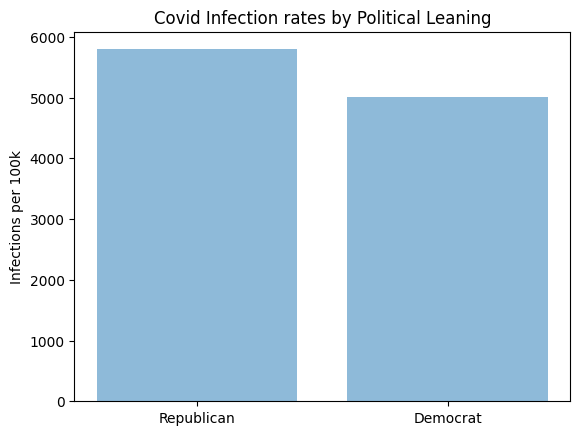

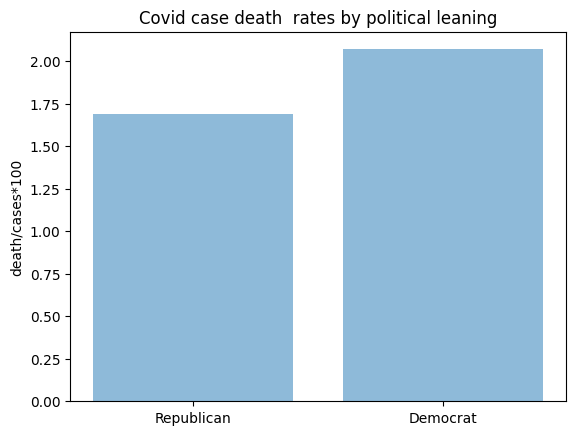

In [223]:
plt.rcdefaults()
objects = ('Republican','Democrat')
y_pos = np.arange(len(objects))
performance = [csse[csse['politicalLeaning'] == 2]['Incident_Rate'].mean(),csse[csse['politicalLeaning'] == 1]['Incident_Rate'].mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Infections per 100k')
plt.title('Covid Infection rates by Political Leaning')

plt.show()

plt.bar(y_pos, [repub_fatality,dem_fatality], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('death/cases*100')
plt.title('Covid case death  rates by political leaning')

plt.show()

We see that overall, the effect of political leaning seems pretty mixed, with republicans having higher infection rates, but slightly lower death rates. However, we cannot really conclude anything with these plots, as we don't have statistics such as testing rates, as well as % of positives. For example, if we could conclude that republican states test more, then we would have to account for the differential in testing, as they would certainly get more positives, but that could also possibly reduce covid death rates, if they tested non-serious/asymptomatic cases. Some interesting plots we can do is scatterplot with percentMale, percentWhite, percentDem vs incident rates, as well as fatality ratios

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


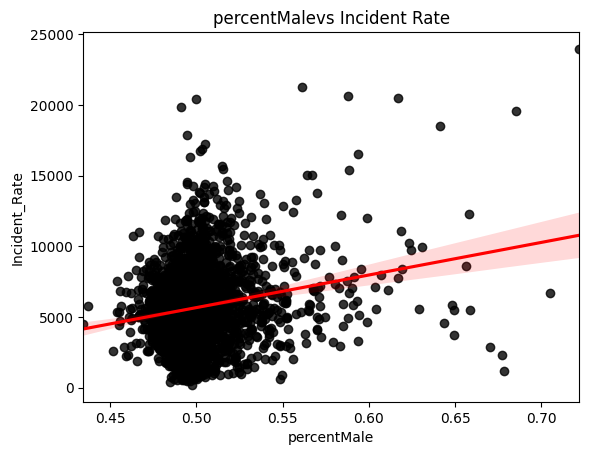

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


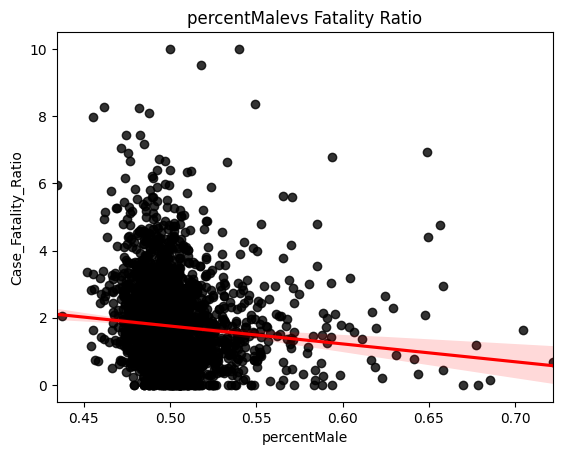

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


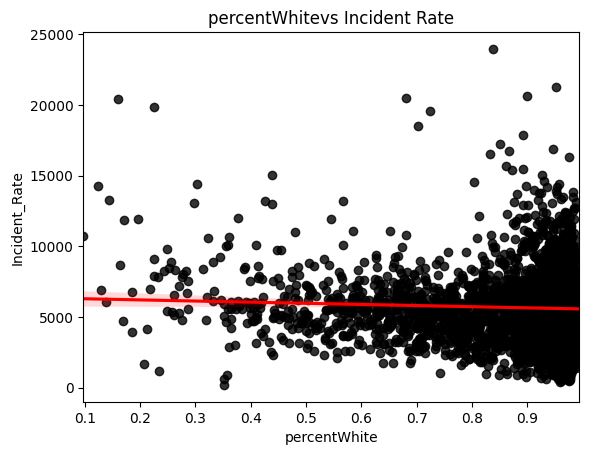

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


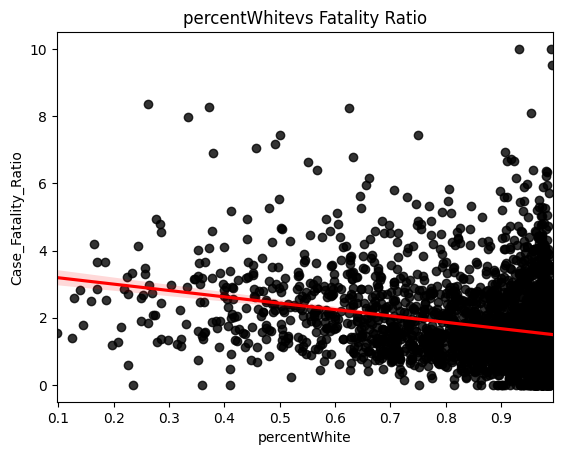

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


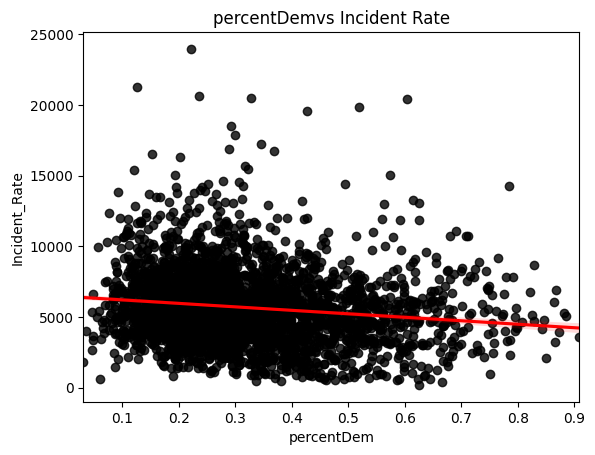

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


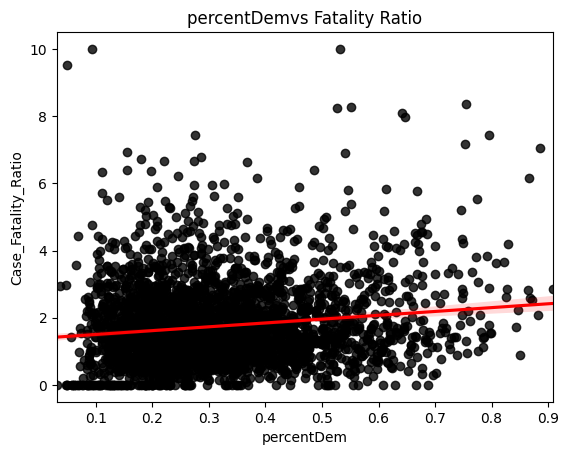

In [248]:

for i in ['percentMale','percentWhite','percentDem']:
  sns.regplot(csse[i], csse.Incident_Rate
  , scatter_kws={"color": "black"}, line_kws={"color": "red"})
  plt.title(i +'vs Incident Rate')
  plt.show()
  sns.regplot(csse[i], csse.Case_Fatality_Ratio, scatter_kws={"color": "black"}, line_kws={"color": "red"}
  )
  plt.title(i +'vs Fatality Ratio')
  plt.show()

Unfortunately, we see that most of the plots do not seem to exhibit any strong relationships, the only ones that stand out would be that as percent male goes up, there is a strong correlation with incident rate increasing as well. Additionally, percentMale is also slightly correlated with fatality ratio. It is rather interesting that gender demographics seem to be the only variable that seems to affect the two variables we are trying to predict. We can further narrow down this chart, to only include republican or democrat leaning states, which might give us better insights.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


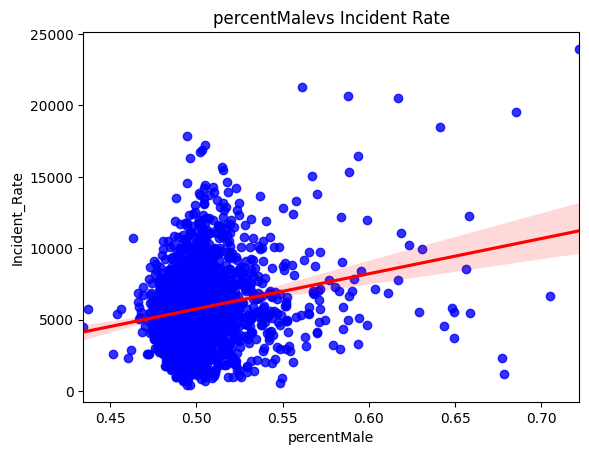

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


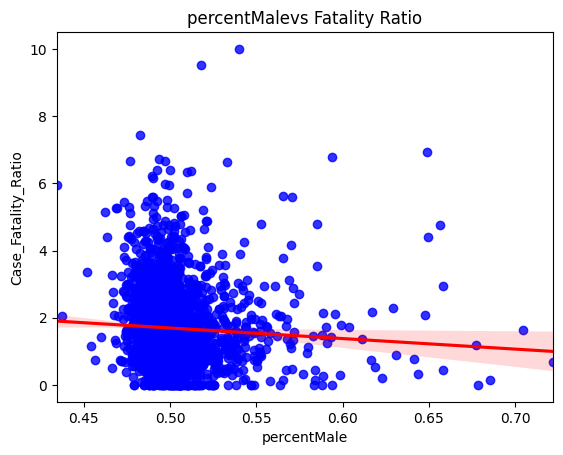

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


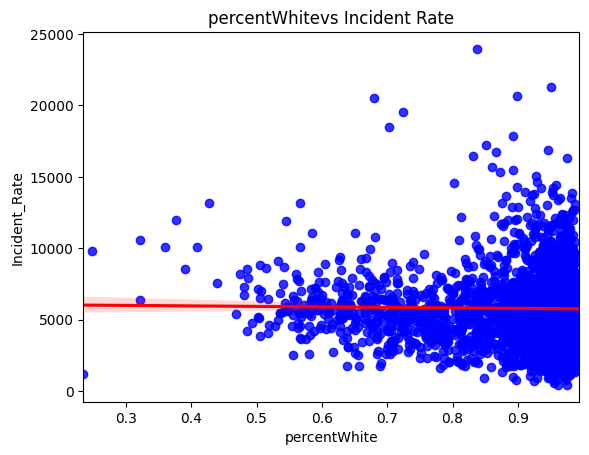

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


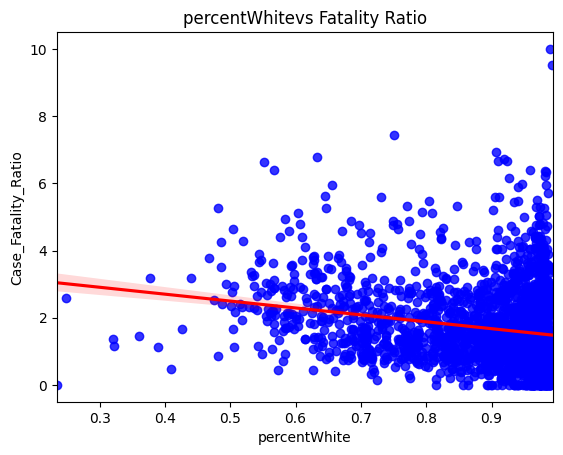

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


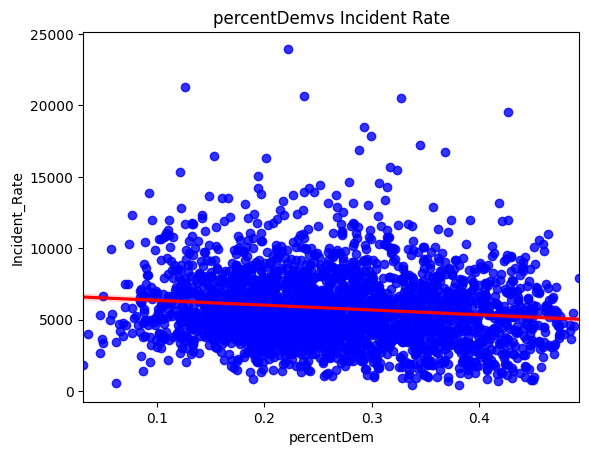

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


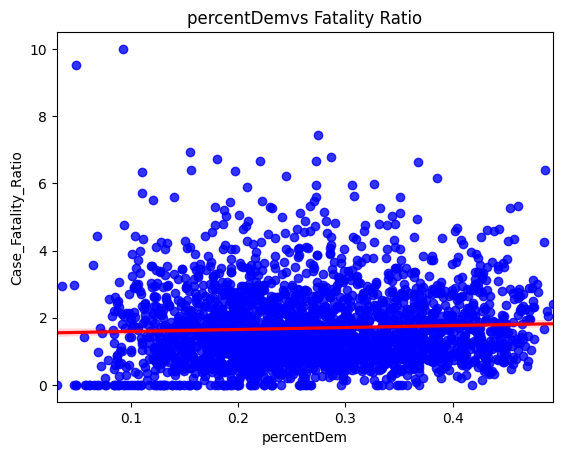

In [249]:
repub = csse[csse['politicalLeaning']==2]
for i in ['percentMale','percentWhite','percentDem']:
  sns.regplot(repub[i], repub.Incident_Rate
  , scatter_kws={"color": "blue"}, line_kws={"color": "red"})
  plt.title(i +'vs Incident Rate (repub)')
  plt.show()
  sns.regplot(repub[i], repub.Case_Fatality_Ratio, scatter_kws={"color": "blue"}, line_kws={"color": "red"}
  )
  plt.title(i +'vs Fatality Ratio(repub)')
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


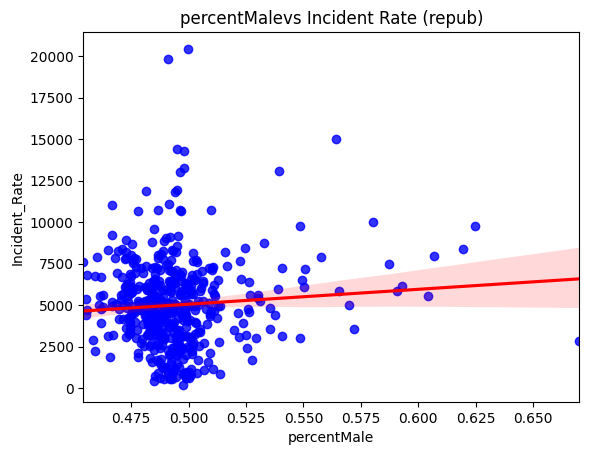

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


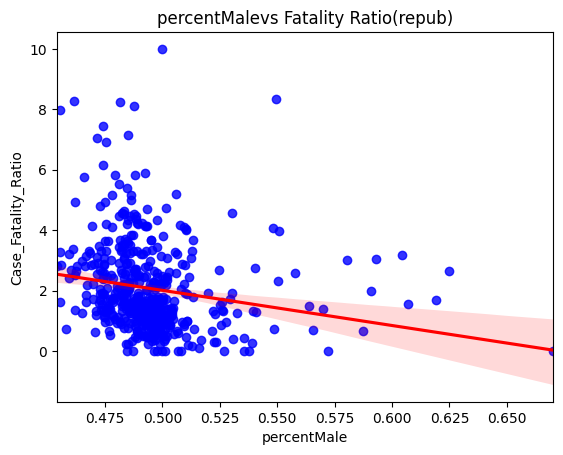

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


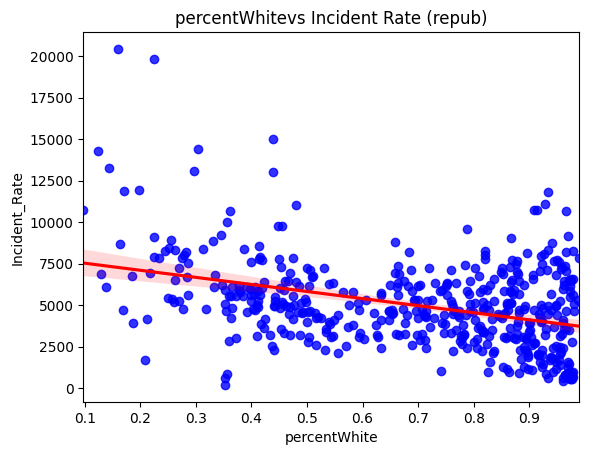

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


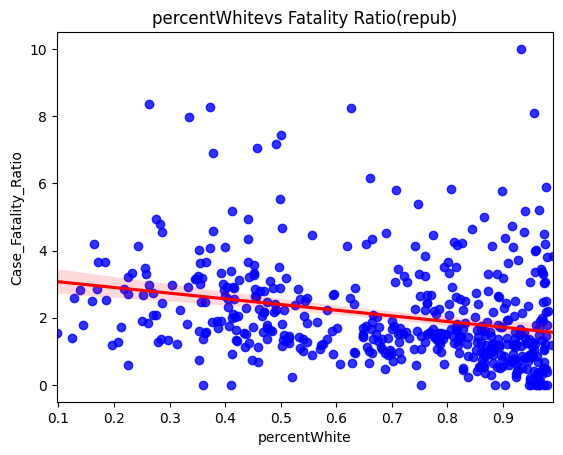

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


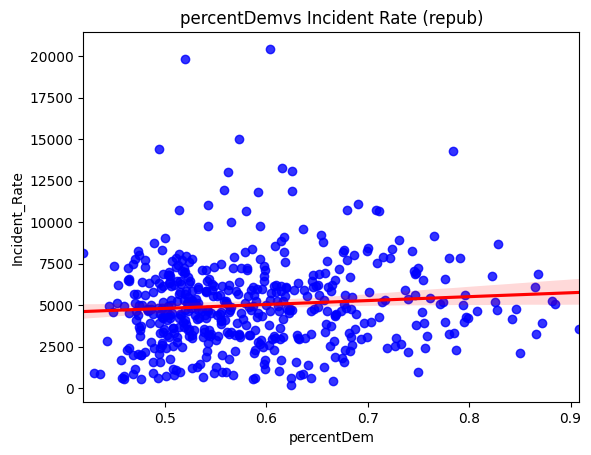

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


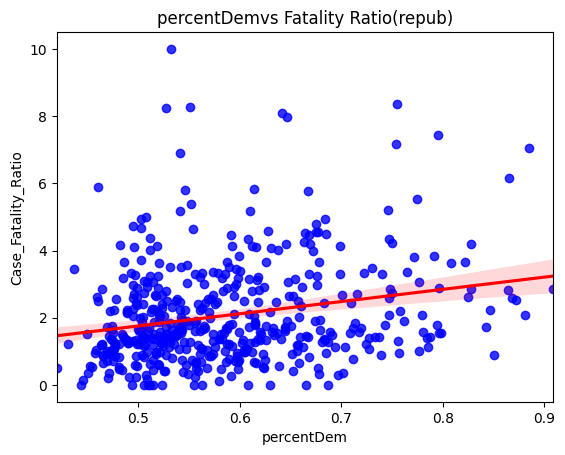

In [250]:
dem = csse[csse['politicalLeaning']==1]
for i in ['percentMale','percentWhite','percentDem']:
  sns.regplot(dem[i], dem.Incident_Rate
  , scatter_kws={"color": "blue"}, line_kws={"color": "red"})
  plt.title(i +'vs Incident Rate (dem)')
  plt.show()
  sns.regplot(dem[i], dem.Case_Fatality_Ratio, scatter_kws={"color": "blue"}, line_kws={"color": "red"}
  )
  plt.title(i +'vs Fatality Ratio(dem)')
  plt.show()

Interestingly enough, when we separate by republican/democrat, nothing really changes for the republican plots, but for the democrat graphs, we see that percent white is negatively correlated with incident rate and fatality ratio. Thus, it might be a good idea for us to treat political leaning as a random effect, as it changes how the variables interact. Now that I am done with data preprocessing and plots, I will switch to R for the modeling.


In [252]:
from google.colab import files

csse.to_csv('final_project.csv')
files.download('final_project.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>